In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.distutils.conv_template import header
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

/var/folders/8q/ww9wlcg946l4mbz6q4n9yylc0000gn/T/ipykernel_3701/3723437223.py:5: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  from numpy.distutils.conv_template import header


In [11]:
df = pd.read_csv('data/Warehouse_and_Retail_Sales.csv').copy()

df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [13]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307643
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM CODE         307477 non-null  object 
 4   ITEM DESCRIPTION  307477 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307477 non-null  float64
 7   RETAIL TRANSFERS  307477 non-null  float64
 8   WAREHOUSE SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


In [17]:
df = df.copy()
df['date'] = pd.to_datetime(df.assign(DAY=1)[['YEAR', 'MONTH', 'DAY']])
df.drop(['YEAR', 'MONTH'], axis=1, inplace=True)
df

,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,date
0,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00,2020-01-01
1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00,2020-01-01
2,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00,2020-01-01
3,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00,2020-01-01
4,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00,2020-01-01
...,...,...,...,...,...,...,...,...
307639,MILLER BREWING COMPANY,99740,MOLSON GOLDEN 2/12 LNNR - 12OZ,BEER,5.50,9.0,108.50,2020-09-01
307640,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00,2020-09-01
307641,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75,2020-09-01
307642,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00,2020-09-01


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307643
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SUPPLIER          307477 non-null  object        
 1   ITEM CODE         307477 non-null  object        
 2   ITEM DESCRIPTION  307477 non-null  object        
 3   ITEM TYPE         307477 non-null  object        
 4   RETAIL SALES      307477 non-null  float64       
 5   RETAIL TRANSFERS  307477 non-null  float64       
 6   WAREHOUSE SALES   307477 non-null  float64       
 7   date              307477 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 21.1+ MB


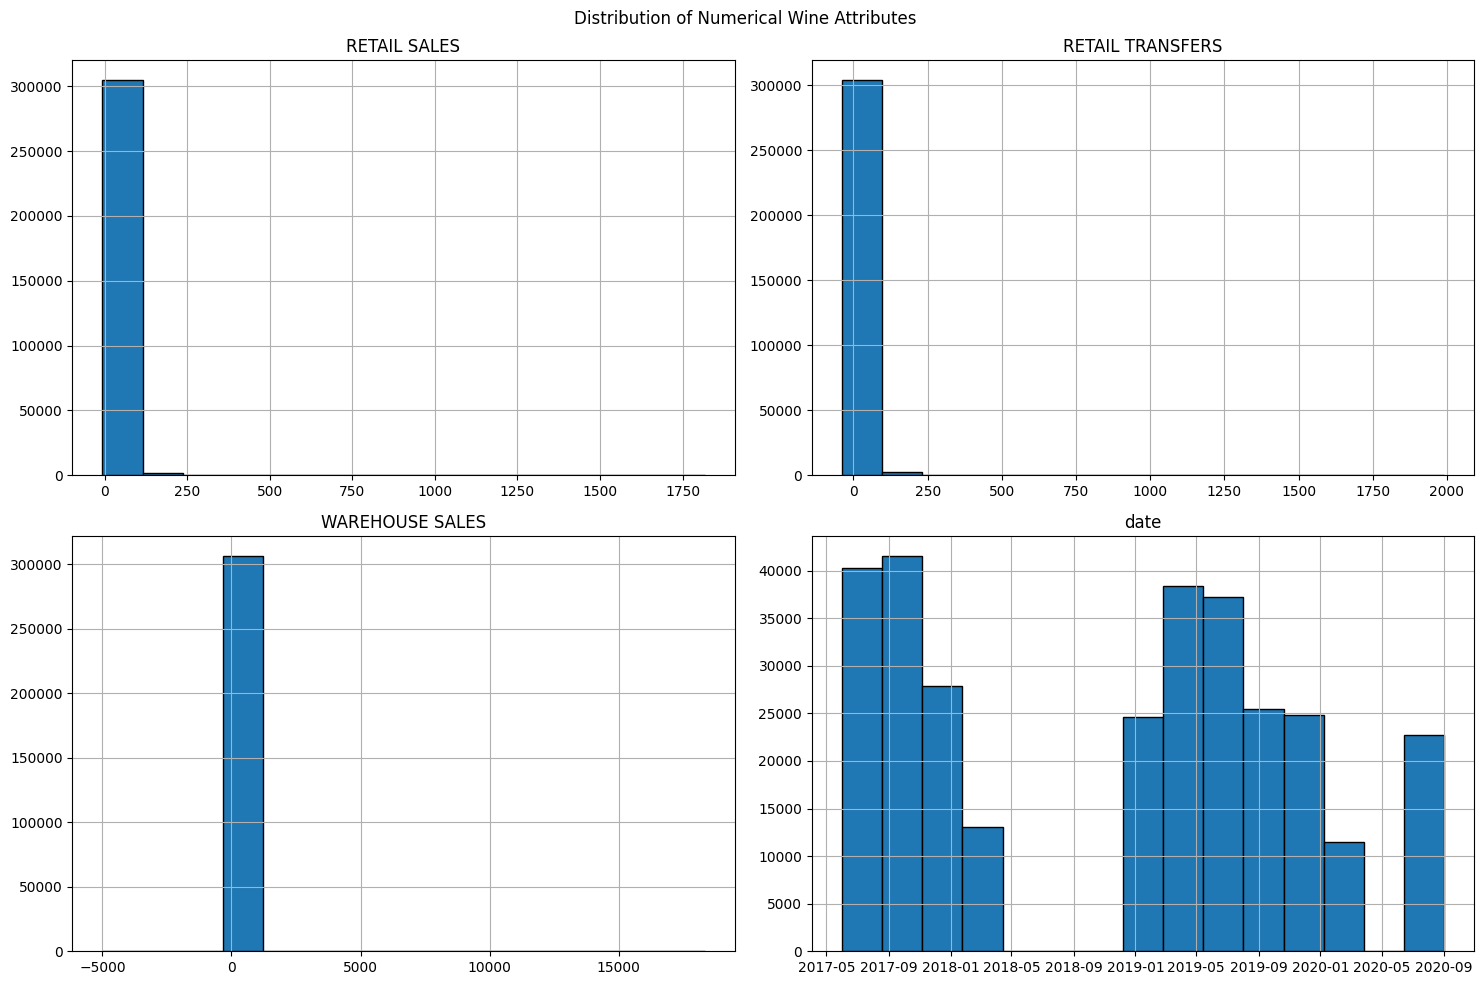

In [19]:
# Histograms
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Wine Attributes')
plt.tight_layout()
plt.show()

In [29]:
df1 = df.dropna(subset=['ITEM TYPE', 'RETAIL SALES'])
df1

TypeError: drop() got an unexpected keyword argument 'subset'